In [1]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#loading the data from my own github repo
# Loading Data from Github

# Loading Data from Github

url0 = "https://github.com/vidhika-git/DAV-6150/blob/main/project1/Project1_Data.csv?raw=true"


# Reading Data via pd.read_csv
df = pd.read_csv(url0)

# Displaying first 10 rows of the data
df.head(5)

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,63,10%,310,47%,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,30,9%,169,52%,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,33,10%,141,42%,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,42,11%,183,50%,23,6%,10,3%,18,5%,0,0%,91,25%


In [4]:
df.shape

(73152, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

In [31]:
df.duplicated().value_counts()

False    39674
dtype: int64

In [6]:
df['dropout_cnt'].value_counts()

-       33478
0        7593
1        6271
2        4296
3        3257
4        2550
5        1908
6        1477
7        1182
8         962
9         774
10        609
11        572
12        527
13        426
14        390
15        340
16        289
17        264
19        264
18        229
20        205
21        169
24        163
22        160
23        149
25        143
26        130
28        115
27         99
32         94
31         87
34         85
30         78
29         74
35         73
36         73
39         72
33         70
40         69
38         60
41         60
44         57
43         56
45         55
54         53
37         53
50         51
46         49
42         44
60         39
51         38
66         38
53         36
65         36
52         35
47         35
57         35
81         34
56         34
48         34
98         32
69         31
55         30
74         30
49         30
106        29
125        28
73         27
58         27
88         27
62    

In [7]:
# Drop rows where the target variable contains '-'
df = df[df['dropout_cnt'] != '-']

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [8]:
# Remove '%' sign and convert to integer
perc=['grad_pct','local_pct','reg_pct','non_diploma_credential_pct','still_enr_pct','ged_pct','dropout_pct','reg_adv_pct']
for col in perc:
    df[col] = df[col].str.rstrip('%').astype(int)

In [9]:
# Columns to convert to numeric
numeric_cols = [
    'enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt',
    'reg_adv_cnt', 'non_diploma_credential_cnt', 
    'still_enr_cnt',  'ged_cnt',  'dropout_cnt', 
]

# Convert object columns to numeric
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [10]:
#df['nyc_ind'] = df['nyc_ind'].astype(bool)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39674 entries, 0 to 39673
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          39674 non-null  object
 1   aggregation_index           39674 non-null  int64 
 2   aggregation_type            39674 non-null  object
 3   aggregation_name            39674 non-null  object
 4   nrc_code                    39674 non-null  int64 
 5   nrc_desc                    39674 non-null  object
 6   county_code                 39674 non-null  int64 
 7   county_name                 39674 non-null  object
 8   nyc_ind                     39674 non-null  int64 
 9   membership_desc             39674 non-null  object
 10  subgroup_code               39674 non-null  int64 
 11  subgroup_name               39674 non-null  object
 12  enroll_cnt                  39674 non-null  int64 
 13  grad_cnt                    39674 non-null  in

In [12]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print()

Column: report_school_year
2018-19    39674
Name: report_school_year, dtype: int64

Column: aggregation_index
3    39674
Name: aggregation_index, dtype: int64

Column: aggregation_type
District    39674
Name: aggregation_type, dtype: int64

Column: aggregation_name
SYRACUSE CITY SCHOOL DISTRICT                                   116
NEW YORK CITY GEOGRAPHIC DISTRICT #28                           108
NEW YORK CITY GEOGRAPHIC DISTRICT #14                           108
NEW YORK CITY GEOGRAPHIC DISTRICT # 3                           108
NEW YORK CITY GEOGRAPHIC DISTRICT #31                           108
NEW YORK CITY GEOGRAPHIC DISTRICT #30                           108
BUFFALO CITY SCHOOL DISTRICT                                    108
NEW YORK CITY GEOGRAPHIC DISTRICT # 7                           108
NEW YORK CITY GEOGRAPHIC DISTRICT # 8                           108
NEW YORK CITY GEOGRAPHIC DISTRICT # 9                           108
NEW YORK CITY GEOGRAPHIC DISTRICT #10                 

Column: report_school_year <br>
2018-19    39674 <br>
Name: report_school_year, dtype: int64  <br>

Column: aggregation_index <br>
3    39674 <br>
Name: aggregation_index, dtype: int64<br>

Column: aggregation_type<br>
District    39674  <br>
Name: aggregation_type, dtype: int64<br>

<b>Constant Values </b>: If these columns have the same value for all rows in the dataset, they do not contribute to explaining 
variation in the target variable or providing any useful information for analysis.

<b>Redundancy:</b> Including columns with constant values adds unnecessary complexity to the dataset and model without adding 
any value. It may lead to overfitting and decrease the interpretability of the model.

<b>Dimensionality Reduction: </b>Removing columns with constant values can help reduce the dimensionality of the dataset,
making it easier to manage and analyze.

In [13]:
# Drop columns with constant values
df.drop(columns=['report_school_year', 'aggregation_index', 'aggregation_type'], inplace=True)


<b>Redundancy:</b> If the percentage column is derived directly from the count column (e.g., percentage = grad count / enroll count),
including both variables in the model may introduce multicollinearity. In such cases, it's generally preferable to choose one variable that captures the information 
more directly and avoid redundancy in the model.<br>
<b>Therefore dropping all the calculated perecentage columns</b>

In [14]:
df.drop(columns=['grad_pct','local_pct','reg_pct','non_diploma_credential_pct','still_enr_pct','ged_pct','dropout_pct','reg_adv_pct'],inplace=True)

In [15]:
df.head()

,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,63,310,91,16,30,0,148
1,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,30,169,47,2,11,0,65
2,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,33,141,44,14,19,0,83
3,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,42,183,23,10,18,0,91
4,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,Hispanic,98,58,13,40,5,4,8,0,28


checking the distribution of target variable

C:\Users\admin\AppData\Local\Temp\ipykernel_24656\4199344808.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plott, kde=False);


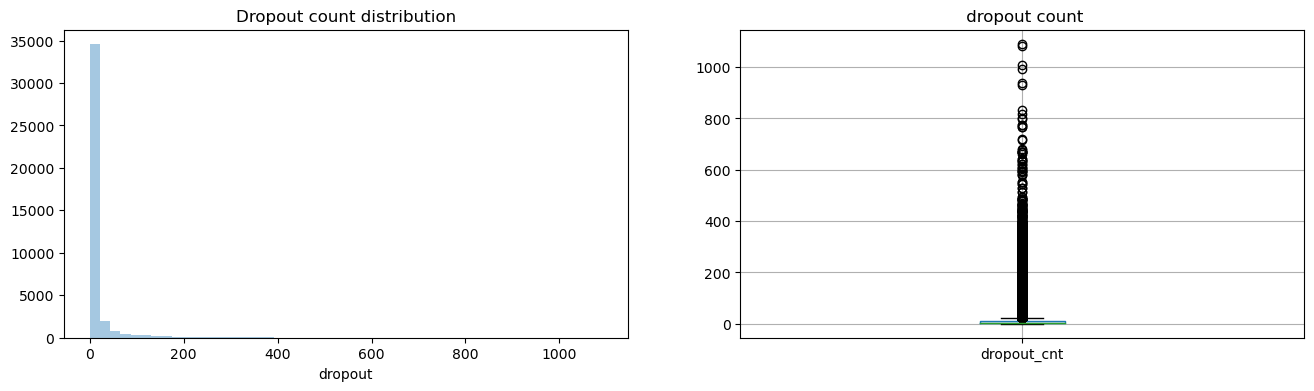

In [16]:

plott=df[df['dropout_cnt'].notnull()]['dropout_cnt']

#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.distplot(plott, kde=False);
plt.title("Dropout count distribution");
plt.xlabel('dropout')


plt.subplot(1, 2, 2)
#plt.ylabel('mg/L')
df.boxplot(column='dropout_cnt');
plt.title(" dropout count");

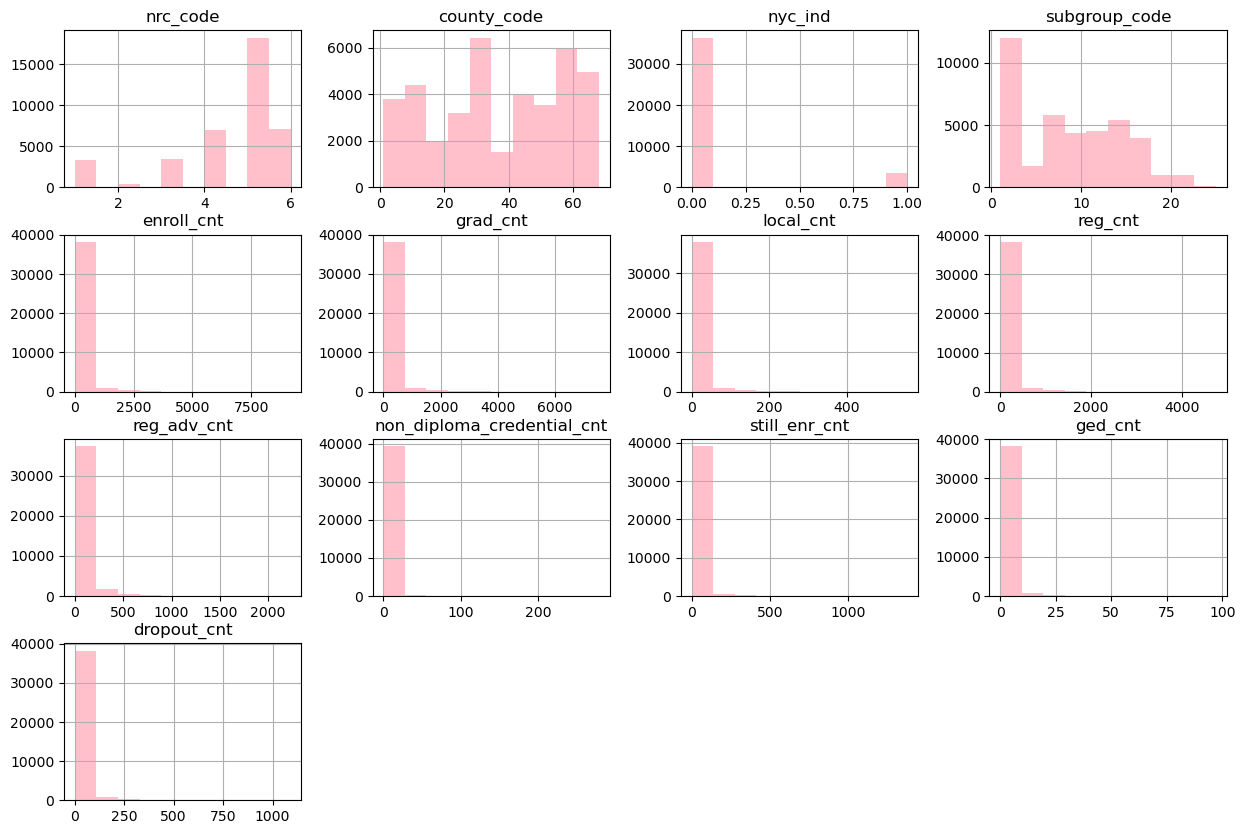

In [17]:
df[df.columns].hist(figsize=(15,10), color='pink');

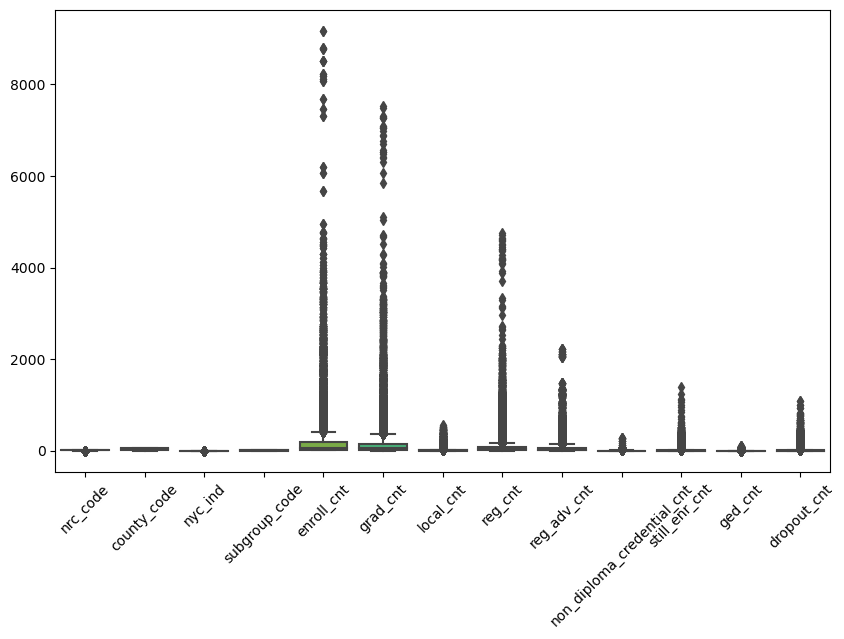

In [18]:
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [19]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\admin\AppData\Local\Temp\ipykernel_24656\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
nrc_code,1.000000,0.155745,-0.771826,-0.085670,-0.419656,-0.376972,-0.493489,-0.444701,-0.150416,-0.358429,-0.445393,-0.433131,-0.514003
county_code,0.155745,1.000000,-0.061661,0.005875,-0.009123,-0.001498,-0.019260,0.000336,0.000001,-0.044201,-0.020422,-0.049946,-0.041745
nyc_ind,-0.771826,-0.061661,1.000000,0.055672,0.507894,0.479326,0.527457,0.517293,0.297282,0.385218,0.482243,0.481667,0.513289
subgroup_code,-0.085670,0.005875,0.055672,1.000000,0.029509,0.024988,0.039884,0.029608,0.008017,0.026863,0.037364,0.028800,0.042167
enroll_cnt,-0.419656,-0.009123,0.507894,0.029509,1.000000,0.993603,0.831018,0.979747,0.836960,0.511030,0.762840,0.814510,0.846691
grad_cnt,-0.376972,-0.001498,0.479326,0.024988,0.993603,1.000000,0.790687,0.971027,0.878928,0.478744,0.708722,0.783183,0.795895
local_cnt,-0.493489,-0.019260,0.527457,0.039884,0.831018,0.790687,1.000000,0.817128,0.520575,0.587427,0.701385,0.767464,0.871071
reg_cnt,-0.444701,0.000336,0.517293,0.029608,0.979747,0.971027,0.817128,1.000000,0.744442,0.515351,0.737750,0.820034,0.851021
reg_adv_cnt,-0.150416,0.000001,0.297282,0.008017,0.836960,0.878928,0.520575,0.744442,1.000000,0.284526,0.504600,0.551338,0.508226
non_diploma_credential_cnt,-0.358429,-0.044201,0.385218,0.026863,0.511030,0.478744,0.587427,0.515351,0.284526,1.000000,0.333619,0.474265,0.584549


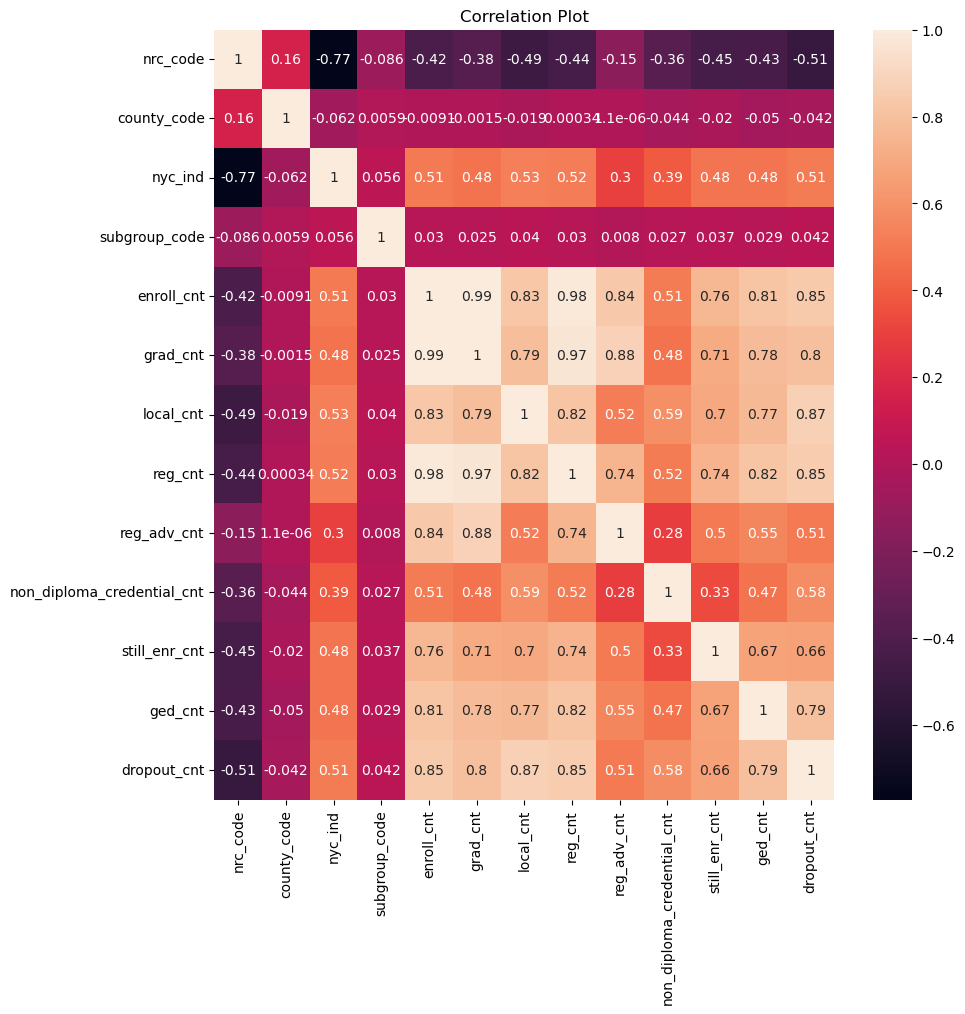

In [20]:
plt.figure(figsize=(10,10))
plt.title("Correlation Plot")
sns.heatmap(correlation_matrix,annot=True)
plt.show()

County name and county code have same information about the area of the school so we will drop county name and keep county code

In [21]:
df.drop(columns='county_name',inplace=True)

subgroup name and subgroup code have same information about the type of group so we will drop subgroup name and keep  code

In [22]:
df.drop(columns='subgroup_name',inplace=True)

nrc name and nrc code have same information about the  type of school district so we will drop nrc name and keep code

In [23]:
df.drop(columns='nrc_desc',inplace=True)

In [24]:
#df.head()

In [25]:
#df['nyc_ind'] = df['nyc_ind'].astype(int)

In [26]:

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['membership_desc'])

# Concatenate the one-hot encoded columns with your original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original "nrc_desc" column as it's no longer needed
df_encoded.drop('membership_desc', axis=1, inplace=True)


In [27]:
df_encoded.head()

,aggregation_name,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt,2013 Total Cohort - 6 Year Outcome,2013 Total Cohort - 6 Year Outcome - August 2019,2014 Total Cohort - 5 Year Outcome,2014 Total Cohort - 5 Year Outcome - August 2019,2015 Total Cohort - 4 Year Outcome,2015 Total Cohort - 4 Year Outcome - August 2019
0,ALBANY CITY SCHOOL DISTRICT,3,1,0,1,658,464,63,310,91,16,30,0,148,1,0,0,0,0,0
1,ALBANY CITY SCHOOL DISTRICT,3,1,0,2,324,246,30,169,47,2,11,0,65,1,0,0,0,0,0
2,ALBANY CITY SCHOOL DISTRICT,3,1,0,3,334,218,33,141,44,14,19,0,83,1,0,0,0,0,0
3,ALBANY CITY SCHOOL DISTRICT,3,1,0,5,367,248,42,183,23,10,18,0,91,1,0,0,0,0,0
4,ALBANY CITY SCHOOL DISTRICT,3,1,0,6,98,58,13,40,5,4,8,0,28,1,0,0,0,0,0


we will also drop the aggregation_name column it has too many unique value and its explaniable from the other columns

In [28]:
df_encoded.drop(columns='aggregation_name',inplace=True)

In [33]:
df_encoded.head()

,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt,2013 Total Cohort - 6 Year Outcome,2013 Total Cohort - 6 Year Outcome - August 2019,2014 Total Cohort - 5 Year Outcome,2014 Total Cohort - 5 Year Outcome - August 2019,2015 Total Cohort - 4 Year Outcome,2015 Total Cohort - 4 Year Outcome - August 2019
0,3,1,0,1,658,464,63,310,91,16,30,0,148,1,0,0,0,0,0
1,3,1,0,2,324,246,30,169,47,2,11,0,65,1,0,0,0,0,0
2,3,1,0,3,334,218,33,141,44,14,19,0,83,1,0,0,0,0,0
3,3,1,0,5,367,248,42,183,23,10,18,0,91,1,0,0,0,0,0
4,3,1,0,6,98,58,13,40,5,4,8,0,28,1,0,0,0,0,0


Data Preprocessing:

Ensure your dataset is cleaned and prepared for analysis.
Encode categorical variables if necessary.
Split the dataset into training and testing sets.
Feature Selection:

Perform feature selection techniques such as:
Manual selection based on domain knowledge.
Recursive Feature Elimination (RFE).
Feature importance from decision trees or Random Forests.
Correlation analysis.
Dimensionality reduction techniques like PCA (Principal Component Analysis) or LDA (Linear Discriminant Analysis) if you have a large number of features.
Model Construction:

For Poisson Regression:

Fit Poisson regression models using different sets of explanatory variables.
You can use libraries like statsmodels or scikit-learn in Python for this purpose.
Example:
python
Copy code
import statsmodels.api as sm

# Define your Poisson regression model
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
For Negative Binomial Regression:

Fit negative binomial regression models using different sets of explanatory variables.
Example:
python
Copy code
from statsmodels.discrete.discrete_model import NegativeBinomial

# Define your negative binomial regression model
neg_binomial_model = NegativeBinomial(y_train, X_train).fit()
For Multiple Linear Regression:

Fit multiple linear regression models using different sets of explanatory variables.
Example:
python
Copy code
from sklearn.linear_model import LinearRegression

# Define your multiple linear regression model
linear_model = LinearRegression().fit(X_train, y_train)
Model Evaluation:

Evaluate the performance of each model using appropriate metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), or R-squared for regression models.
Compare the performance of different models and sets of explanatory variables.
Note any similarities or differences between the Poisson and negative binomial models, especially if they produce similar results.
Iterate:

If necessary, iterate on feature selection and model construction steps to refine the models further based on performance metrics and domain knowledge.
Final Model Selection:

Select the best-performing models based on evaluation metrics and your understanding of the problem domain.
Interpret Results:

Interpret the coefficients and significance of explanatory variables in the selected models to understand their impact on the target variable.
By following these steps, you can systematically construct and evaluate Poisson regression, negative binomial regression, and multiple linear regression models using different explanatory variables. Adjust the feature selection and model construction steps as needed based on the characteristics of your dataset and the requirements of your analysis.






